<a href="https://colab.research.google.com/github/Mikolaj613/Kurs-Ai/blob/main/8_knn_klasyfikacja_irysow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
import math

In [11]:
df = sns.load_dataset("iris")
print(df['species'].value_counts())

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


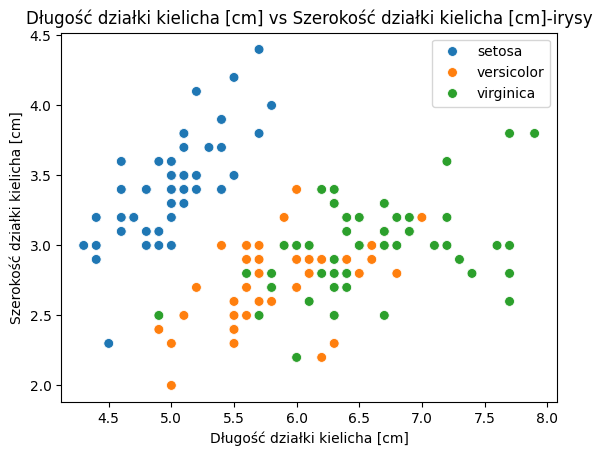

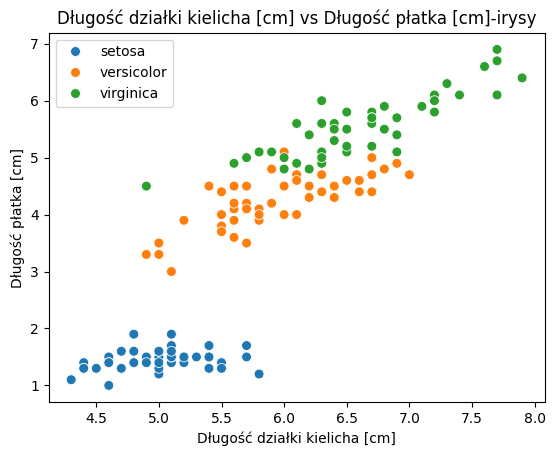

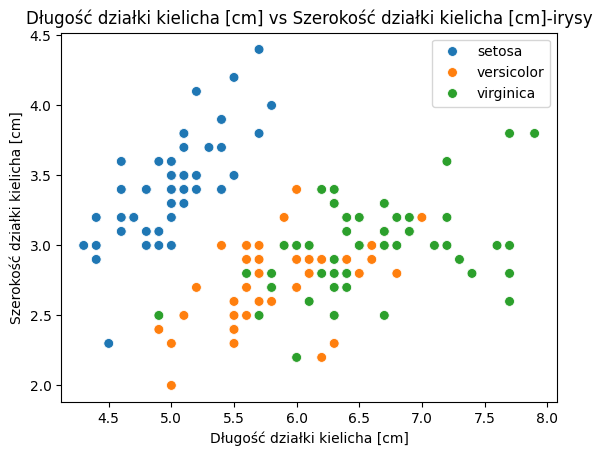

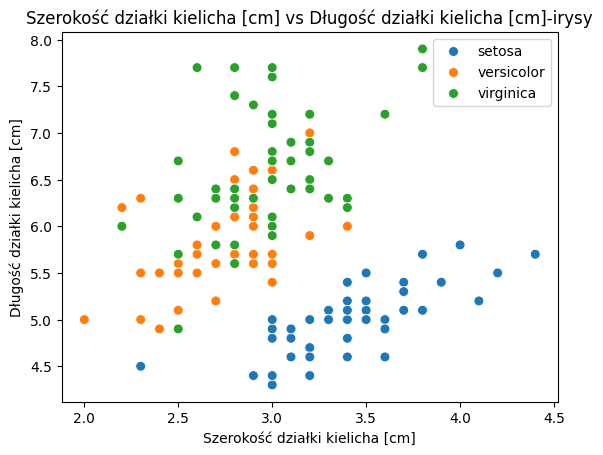

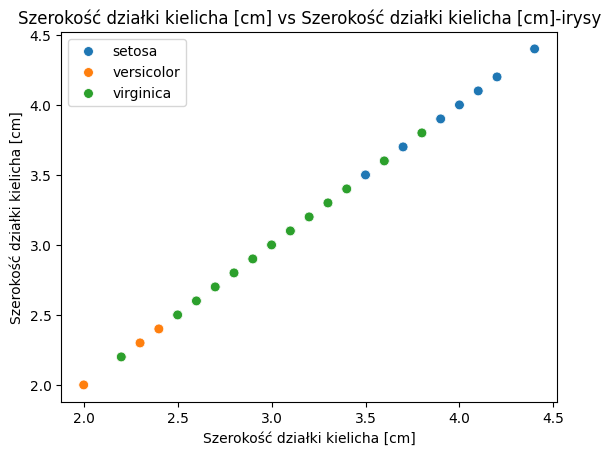

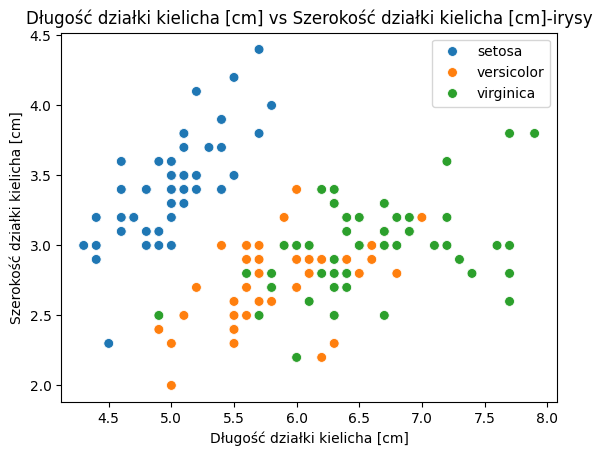

In [12]:
features_pairs = [("sepal_length","sepal_width"),("sepal_length","petal_length"),
                  ("sepal_length","sepal_width"),("sepal_width","sepal_length"),
                  ("sepal_width","sepal_width"),("sepal_length","sepal_width")]
feature_names_pl = {
    "sepal_length": "Długość działki kielicha [cm]",
    "sepal_width": "Szerokość działki kielicha [cm]",
    "petal_length": "Długość płatka [cm]",
    "petal_width": "Szerokość płatka [cm]",
}

for x_feature, y_feature in features_pairs:
  sns.scatterplot(data=df, x=x_feature, y=y_feature, hue="species",s=50)

  x_name_pl = feature_names_pl[x_feature]
  y_name_pl = feature_names_pl[y_feature]
  plt.title(f"{x_name_pl} vs {y_name_pl}-irysy")
  plt.xlabel(feature_names_pl[x_feature])
  plt.ylabel(feature_names_pl[y_feature])
  plt.legend()
  plt.show()
  pass

In [13]:
x = df.drop(columns="species").values
y = df["species"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

print(f"Liczbowo - treningowy: {len(x_train)}")
print(f"Liczbowo - testowy: {len(x_test)}")
print(f"Procentowo - treningowy: {len(x_train)/len(df)*100:.1f}")
print(f"Procentowo - testowy: {len(x_test)/len(df)*100:.1f}")

unique_train, counts_train = np.unique(y_train, return_counts=True)
print(f"Rozkład gatunków w zbiorze treningowym:")
for label, count in zip(unique_train, counts_train):
  print(f"{label}: {count}")
  pass

unique_test, counts_test = np.unique(y_test, return_counts=True)
print(f"Rozkład gatunków w zbiorze testowym:")
for label, count in zip(unique_test, counts_test):
  print(f"{label}: {count}")
  pass

Liczbowo - treningowy: 120
Liczbowo - testowy: 30
Procentowo - treningowy: 80.0
Procentowo - testowy: 20.0
Rozkład gatunków w zbiorze treningowym:
setosa: 40
versicolor: 40
virginica: 40
Rozkład gatunków w zbiorze testowym:
setosa: 10
versicolor: 10
virginica: 10


In [35]:
def knn(x_train,y_train,x_test,k):
  predictions = []
  for x in x_test:
    predictions.append(knn_single(x_train,y_train,x,k))
  return predictions

def calculate_distance(p1,p2):
  distance = 0
  for i in range(len(p1)):
    distance += (p1[i]-p2[i])**2
  return math.sqrt(distance)

def knn_single(x_train,y_train,x,k):
  distances = []

  for i, train_point in enumerate(x_train):
    dist = calculate_distance(train_point,x)
    distances.append((dist,y_train[i]))

  distances.sort(key=lambda x:x[0])


  neighbors = distances[:k]


  votes = {}
  for _, label in neighbors:

    if label in votes:
      votes[label] += 1
    else:
      votes[label] = 1

  return max(votes, key=votes.get)

In [36]:
def test_knn(k):
  predicitions = knn(x_train,y_train,x_test,k)

  for i, pred in enumerate(predicitions):
    if(pred != y_test[i]):
      print(f"proba {i+1}: pred: {pred}, rzecz.: {y_test[i]}")

  correct = np.sum(predicitions == y_test)
  acc = correct /len(y_test)
  print(f"Dokładność: {acc*100:.1f}%")
  pass

In [37]:
test_knn(2)
test_knn(3)
test_knn(15)
test_knn(28)
test_knn(79)

proba 20: pred: versicolor, rzecz.: virginica
Dokładność: 96.7%
Dokładność: 100.0%
proba 26: pred: virginica, rzecz.: versicolor
Dokładność: 96.7%
proba 20: pred: versicolor, rzecz.: virginica
proba 26: pred: virginica, rzecz.: versicolor
Dokładność: 93.3%
proba 2: pred: versicolor, rzecz.: virginica
proba 20: pred: versicolor, rzecz.: virginica
proba 26: pred: virginica, rzecz.: versicolor
Dokładność: 90.0%
